# Demonstrate Image Convolution

Why is convolution important in machine learning.
This goes to the original biological architecture of the human visual cortex
The visual cortex in the brain was mapped by **David H Hubel** and **Torsten Wiesel** who received the Nobel Prize in medicine for this work

What they found
* Neurons in the visual cortex have a small **receptive field**, meaning that they respond to stimuli only from a small region of the eye's visual field
* The **receptive field** of each neuron may overlap by a small amout
* Together all the neurons with their individual receptive field tile the entire visual field
* Moreover they found that some neurons only respond to images of horizontal lines and some neurons only respond to images of vertical lines and rest respond to lines in different but specific orientations

**The last observation let to the speculation that the low level neurons that respond to these primitive shapes feed into higher level neurons. This architecture is able to deduce complex patterns in the visual field**

The idea that neural inputs may be convolved in Machine vision code came from this biologically inspired model

## Load the Image

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(-0.5, 499.5, 752.5, -0.5)

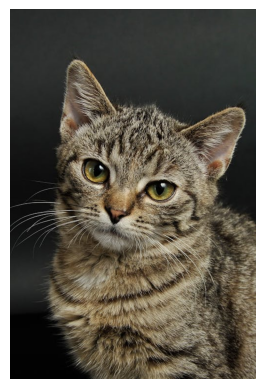

In [17]:
img = plt.imread('/content/drive/MyDrive/image_convolution.jpg')
plt.imshow(img)
plt.axis('off')

## Image Convolution Function

In [18]:
img.shape

(753, 500, 3)

In [91]:
# This is an example of a Low Pass Function ( BLURRING ) Kernel
KernelSize = 5
PadSize = KernelSize//2
Kernel = np.ones(shape=(KernelSize,KernelSize))
Kernel=Kernel/Kernel.size
Kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [93]:
# Pad the Image, also create output image
img_padded = np.pad(img,((PadSize,PadSize),(PadSize,PadSize),(0,0)))
output_img = np.zeros(img.shape)
img_padded.shape, output_img.shape

((757, 504, 3), (753, 500, 3))

(-0.5, 503.5, 756.5, -0.5)

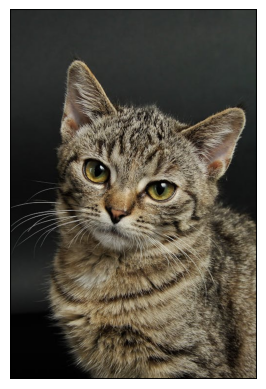

In [94]:
plt.imshow(img_padded)
plt.axis('off')

In [77]:
x=img_padded[1:KernelSize+1,1:KernelSize+1,0]
np.sum(x)/x.size

24.8

Text(0.5, 1.0, 'Applied Kernel')

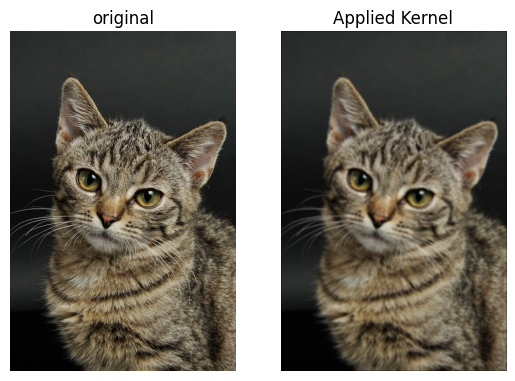

In [97]:
# Convolution
import itertools

for channel,x,y in itertools.product( np.array([0,1,2]), np.arange(img.shape[0]), np.arange(img.shape[1]) ):
  output_img[x,y,channel] = int(np.sum(img_padded[x:x+KernelSize,y:y+KernelSize,channel]*Kernel))

plt.subplot(1,2,1)
plt.imshow(img.astype(np.uint8))
plt.axis('off')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(output_img.astype(np.uint8))
plt.axis('off')
plt.title('Applied Kernel')


# Create Convolution Routine

In [98]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [127]:
def Convolve( img, Kernel, KernelString ):
  KernelSize = Kernel.shape[0]
  PadSize = KernelSize//2

  # Pad the Image, also create output image
  img_padded = np.pad(img,((PadSize,PadSize),(PadSize,PadSize),(0,0)))
  output_img = np.zeros(img.shape)
  for channel,x,y in itertools.product( np.array([0,1,2]), np.arange(img.shape[0]), np.arange(img.shape[1]) ):
    output_img[x,y,channel] = int(np.sum(img_padded[x:x+KernelSize,y:y+KernelSize,channel]*Kernel))

  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.title('original')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(output_img.astype(np.uint8))
  plt.title(KernelString)
  plt.axis('off')

## Play Around with Kernels
1. Vertical Filter
2. Horizontal Filter

### Vertical Convolutional Filter

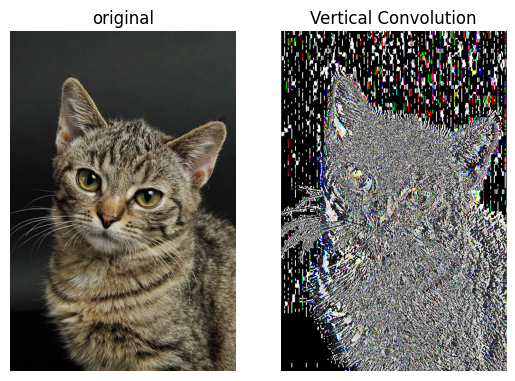

In [129]:
VertFilter = np.array([[-1, 0, 1],
                       [-1, 0, 1],
                       [-1, 0, 1]])

Convolve(img,VertFilter,'Vertical Convolution')

###Horizontal Convolutional Filter

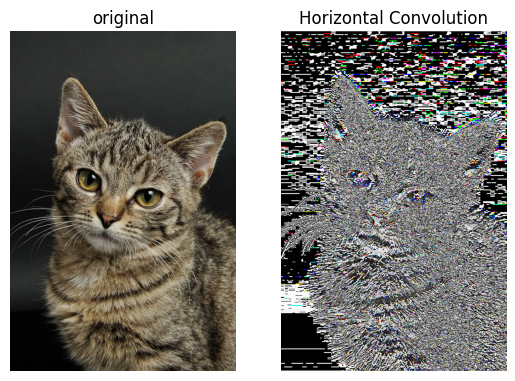

In [132]:
HorizontalFilter = np.array([[-1, -1, -1],
                             [ 0,  0,  0],
                             [ 1,  1,  1]])

Convolve(img,HorizontalFilter,'Horizontal Convolution')